# Predicting Calories Burned in Gym Workouts
This notebook aims to predict the number of calories burned by gym members during workouts based on various features such as session duration, average BPM, workout frequency, experience level, and gender. We will use multiple regression models to evaluate and select the most accurate one.


#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Dataset
Load the dataset containing gym members' exercise tracking data. This dataset includes features such as session duration, heart rate (BPM), workout type, experience level, and calories burned.


In [2]:
data = pd.read_csv("gym_members_exercise_tracking.csv")
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

#### Descriptive Stats:

In [4]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


#### Checking for missing data

In [5]:
data.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

## Exploratory Data Analysis (EDA)
Explore the dataset to understand the distribution of key variables and relationships between features, especially the target variable- **Calories Burned**.


c:\Users\reube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\reube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\reube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\reube\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

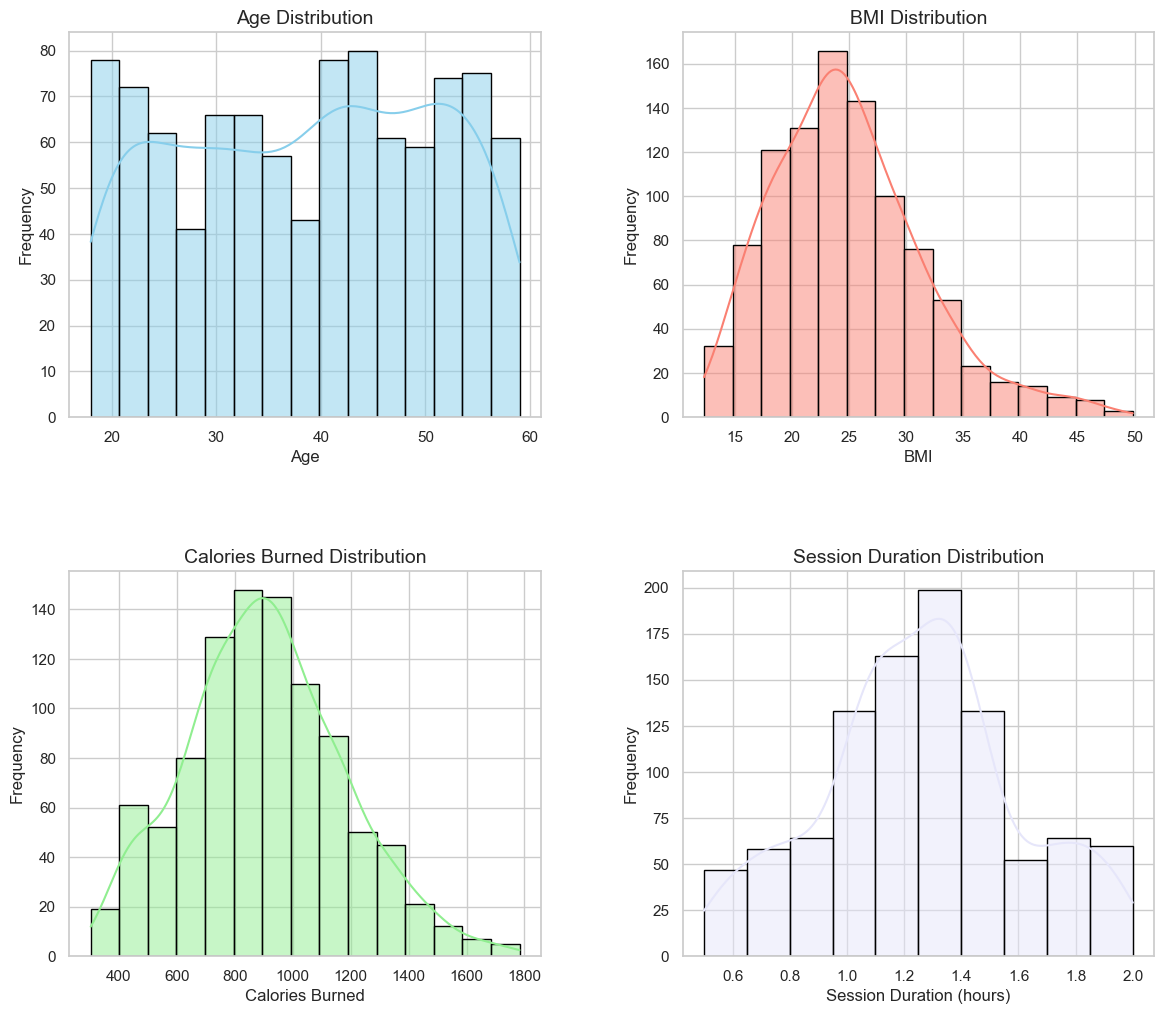

In [6]:
sns.set(style="whitegrid")
sns.set_palette("muted")

# Set up the figure canvas for multiple plots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Age Distribution
sns.histplot(data['Age'], bins=15, kde=True, color="skyblue", edgecolor='black', ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution', fontsize=14)
axs[0, 0].set_xlabel('Age', fontsize=12)
axs[0, 0].set_ylabel('Frequency', fontsize=12)

# BMI Distribution
sns.histplot(data['BMI'], bins=15, kde=True, color="salmon", edgecolor='black', ax=axs[0, 1])
axs[0, 1].set_title('BMI Distribution', fontsize=14)
axs[0, 1].set_xlabel('BMI', fontsize=12)
axs[0, 1].set_ylabel('Frequency', fontsize=12)

# Calories Burned Distribution
sns.histplot(data['Calories_Burned'], bins=15, kde=True, color="lightgreen", edgecolor='black', ax=axs[1, 0])
axs[1, 0].set_title('Calories Burned Distribution', fontsize=14)
axs[1, 0].set_xlabel('Calories Burned', fontsize=12)
axs[1, 0].set_ylabel('Frequency', fontsize=12)

# Session Duration Distribution
sns.histplot(data['Session_Duration (hours)'], bins=10, kde=True, color="lavender", edgecolor='black', ax=axs[1, 1])
axs[1, 1].set_title('Session Duration Distribution', fontsize=14)
axs[1, 1].set_xlabel('Session Duration (hours)', fontsize=12)
axs[1, 1].set_ylabel('Frequency', fontsize=12)

# Add spacing between plots
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # wspace controls width spacing, hspace controls height spacing
plt.show()

In [7]:
gym_data = data.copy() #making a copy for future use

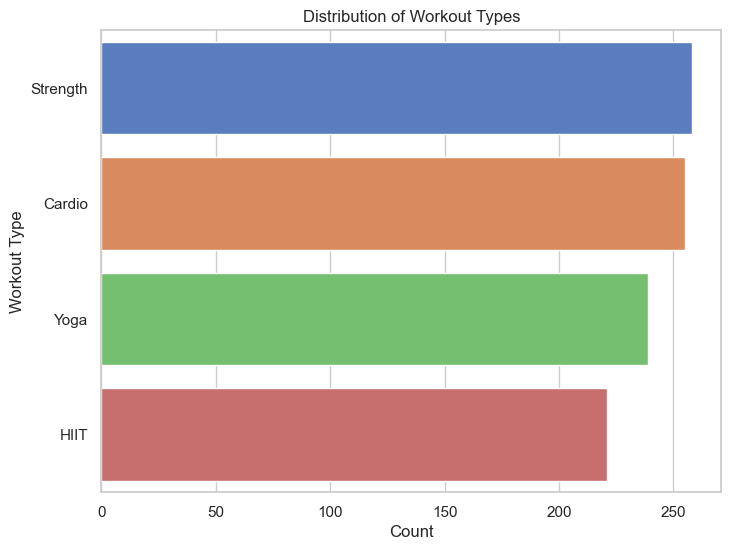

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.countplot(y='Workout_Type', data=gym_data, order=gym_data['Workout_Type'].value_counts().index)
plt.title('Distribution of Workout Types')
plt.xlabel('Count')
plt.ylabel('Workout Type')
plt.show()


## Feature Engineering
Convert categorical variables, such as **Gender** and **Workout Type**, into numeric features using one-hot encoding to prepare the data for model training.


In [9]:
gym_data_copy = gym_data.copy() #making a copy of the dataset
gym_data = pd.get_dummies(gym_data, columns=['Gender'], drop_first=True, dtype=int)
gym_data = pd.get_dummies(gym_data, columns=['Workout_Type'], dtype=int)

gym_data.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,1,0,0,0,1
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0,0,1,0,0
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,0,1,0,0,0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,1,0,0,1,0
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,1,0,0,1,0


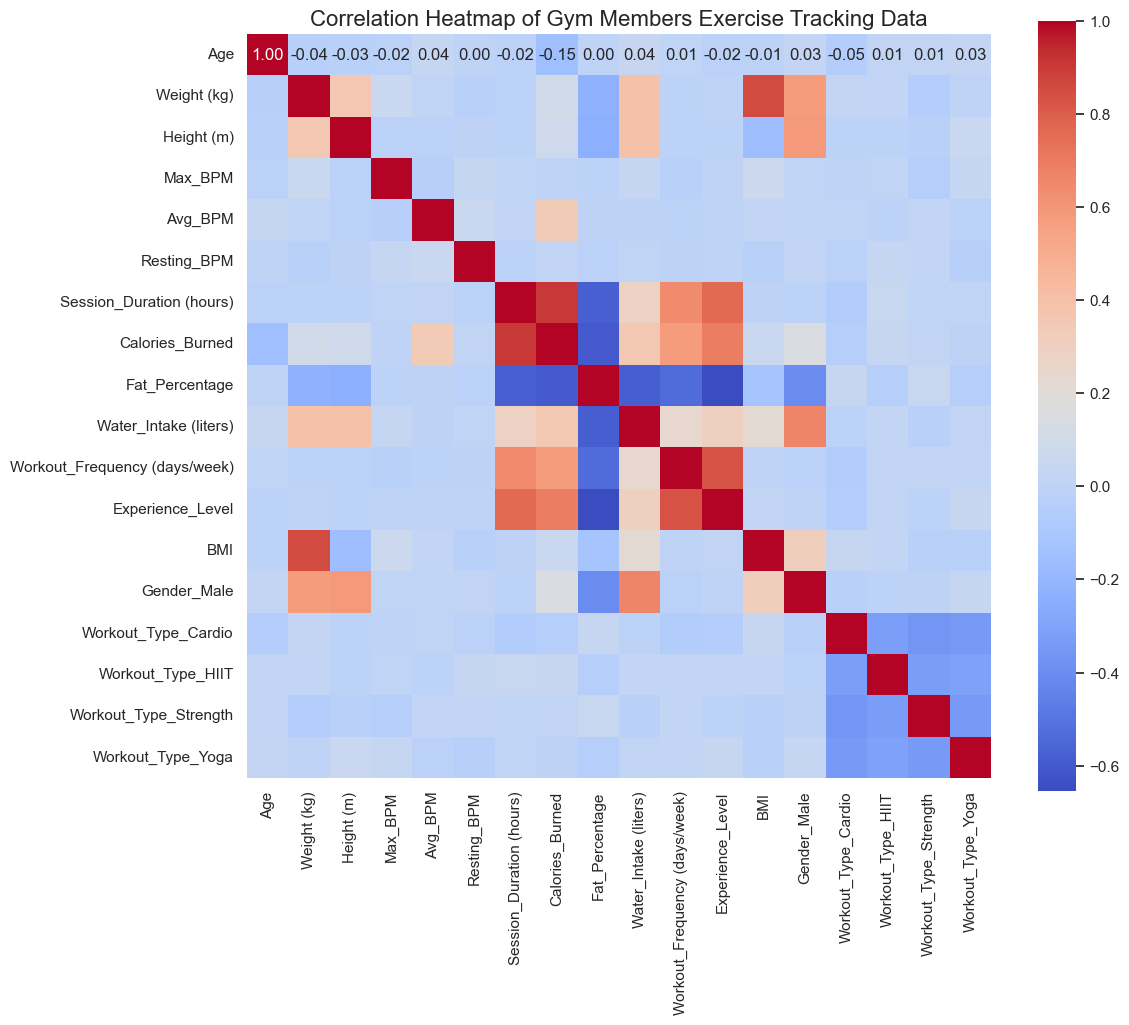

In [10]:
correlation_matrix = gym_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12}, square=True)
plt.title('Correlation Heatmap of Gym Members Exercise Tracking Data', fontsize=16)
plt.show()

### Strong Correlation between:
1. Calories_burned and Session_duration
2. BMI and Weight
3. Workout_Frequency and Experience_Level

### Model Training and Selection

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
features = ['Session_Duration (hours)', 'Workout_Frequency (days/week)', 'Experience_Level', 'Avg_BPM']
X = gym_data[features]
y = gym_data['Calories_Burned']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

#### 1. Linear Regression

In [13]:
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(r2_lr)
print(mae_lr)
print(mse_lr)

0.9345677287863731
53.636103488695085
5458.6889037473675


#### 2. Random Forest

In [14]:
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(r2_rf)
print(mae_rf)
print(mse_rf)

0.9312181728451081
58.245349206349225
5738.12569403345


#### 3. Gradient Bossting

In [15]:
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(r2_gb)
print(mae_gb)
print(mse_gb)

0.9387405698664312
53.1635971163542
5110.5695296476


In [16]:
evaluation_results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting"],
    "MAE": [mae_lr, mae_rf, mae_gb],
    "MSE": [mse_lr, mse_rf, mse_gb],
    "R-squared": [r2_lr, r2_rf, r2_gb]
})

print(evaluation_results)

               Model        MAE          MSE  R-squared
0  Linear Regression  53.636103  5458.688904   0.934568
1      Random Forest  58.245349  5738.125694   0.931218
2  Gradient Boosting  53.163597  5110.569530   0.938741


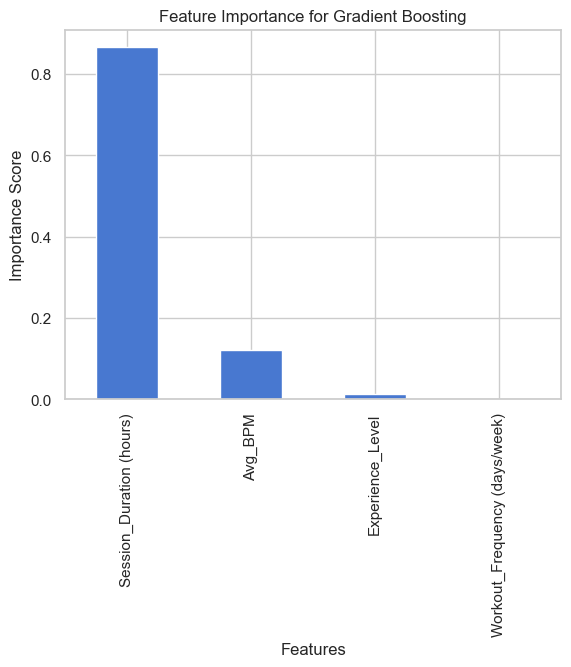

In [17]:
# Feature importance for Gradient Boosting Regressor
feature_importances = pd.Series(gradient_boosting.feature_importances_, index=features)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
feature_importances.plot(kind='bar', title='Feature Importance for Gradient Boosting')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


## Does Gender have a role in Calories Burned? 

In [ ]:
avg_calories_by_gender = gym_data_copy.groupby('Gender')['Calories_Burned'].mean()
print(avg_calories_by_gender)


Gender
Female    862.248918
Male      944.455969
Name: Calories_Burned, dtype: float64


### So males burn more calories on average. Lets explore further

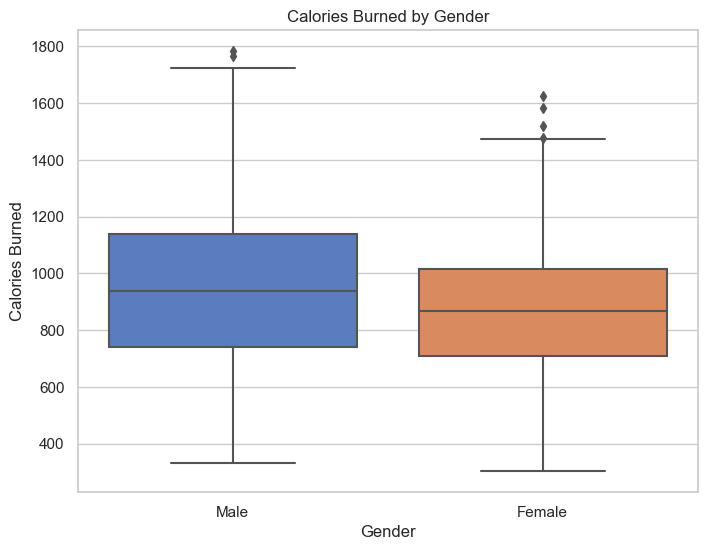

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Calories_Burned', data=gym_data_copy)
plt.title('Calories Burned by Gender')
plt.xlabel('Gender')
plt.ylabel('Calories Burned')
plt.show()


## T-test: Analyzing the Impact of Gender on Calories Burned
Perform a t-test to determine if there is a statistically significant difference in calories burned between male and female gym members.
- **Null Hypothesis (H0)**: There is no difference in calories burned between genders.
- **Alternative Hypothesis (H1)**: There is a significant difference in calories burned between genders.


In [ ]:
from scipy.stats import ttest_ind

calories_male = gym_data_copy[gym_data_copy['Gender'] == 'Male']['Calories_Burned']
calories_female = gym_data_copy[gym_data_copy['Gender'] == 'Female']['Calories_Burned']

t_stat, p_value = ttest_ind(calories_male, calories_female)
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 4.748466491662088
P-value: 2.3581175428096e-06


### T-test Results
The t-test shows a very low p-value (< 0.05), indicating a statistically significant difference in calories burned between genders. This suggests that gender is an important feature for predicting calories burned.


## Feature Selection
Based on the results of the correlation heatmap and t-test, we select the following features for model training:
- **Session Duration (hours)**
- **Workout Frequency (days/week)**
- **Experience Level**
- **Avg BPM**
- **Gender (as a binary variable)**: Gender_Male


In [21]:
features = ['Session_Duration (hours)', 'Workout_Frequency (days/week)', 'Experience_Level', 'Avg_BPM', 'Gender_Male']
X = gym_data[features]
y = gym_data['Calories_Burned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(r2_gb)
print(mae_gb)
print(mse_gb)

0.9599350147610504
50.37755506301189
3342.4224208666847


#### It looks like adding Gender as a feature improved the model’s performance significantly, as indicated by the updated metrics:
1.  R-squared: Increased to 0.9599, suggesting that the model now explains about 96% of the variance in Calories Burned.
2. MAE and MSE: Both decreased, indicating that the model is making more accurate predictions.

### Insights
1. Session Duration (hours): The duration of the workout session is the primary determinant of calorie burn, which makes sense as longer workouts typically consume more energy.
2. Avg_BPM: Average heart rate during the workout also has a notable impact, likely reflecting the workout's intensity.
3. Including Gender as a feature has had a positive impact, validating the findings from the t-test that Gender plays a statistically significant role in calorie burn prediction. This result aligns with the earlier hypothesis, where males generally burn more calories than females under similar conditions.

## Conclusion and Recommendations
The Gradient Boosting model can reliably predict calories burned based on session duration, heart rate, and workout characteristics.

Future Improvements: Hyperparameter tuning or additional domain-specific features (e.g., workout type intensity) could further enhance model accuracy.

Applications: This model could be implemented in a user application, allowing gym members or fitness enthusiasts to estimate calorie burn by inputting workout details.